In [ ]:
import matplotlib.pyplot as plt



/home/holly/Documents/depth-from-defocus/dfd/dfd-sparse/lib/python3.12/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


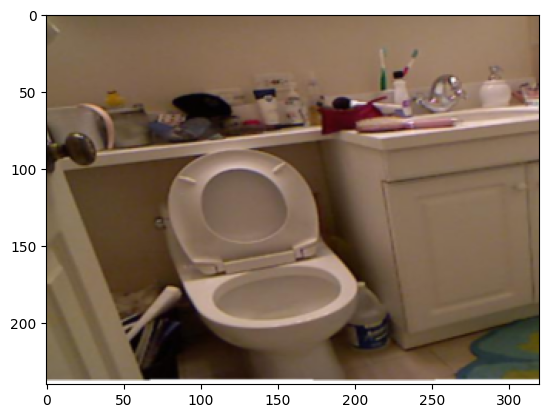

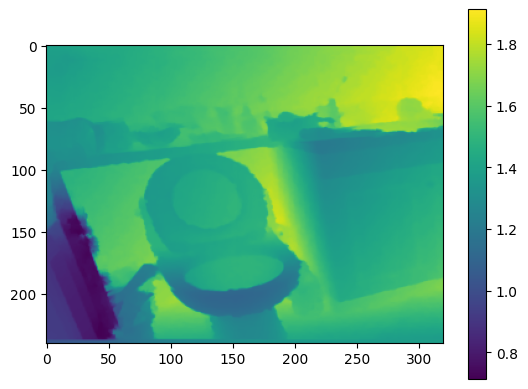

240 320
adaptive kernel size set to 11


In [ ]:
import globals
import dataset_loader
import utils


globals.init_NYUv2()

gt_aif, gt_dpt, _ = dataset_loader.load_example_image(fs=5, res='half')

plt.imshow(gt_aif / 255.)
plt.show()

plt.imshow(gt_dpt)
plt.colorbar()
plt.show()

width, height = gt_dpt.shape
print(width, height)

max_kernel_size = utils.kernel_size_heuristic(width, height)
print('adaptive kernel size set to',max_kernel_size)
utils.update_max_kernel_size(max_kernel_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00733042..1.0363318].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.009103269..1.0079689].


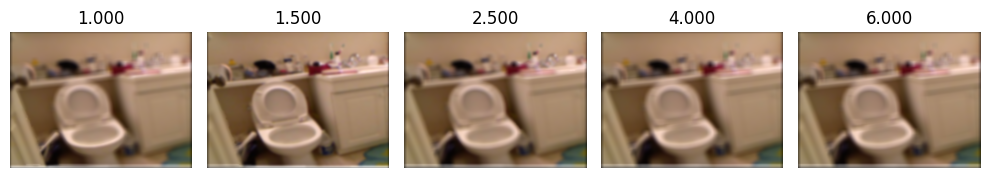

In [ ]:


import forward_model
# Generate synthetically-blurred defocus stack 
defocus_stack = forward_model.forward(gt_dpt, gt_aif)
utils.plot_single_stack(defocus_stack / 255., globals.Df)


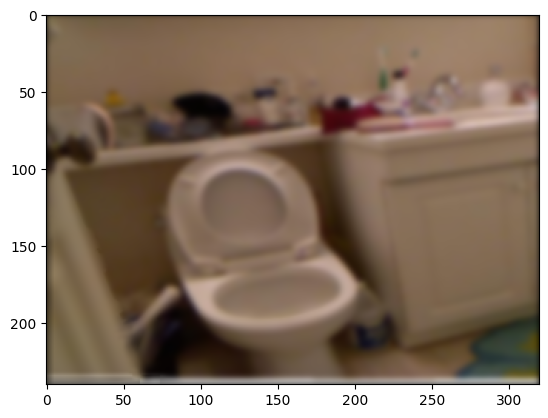

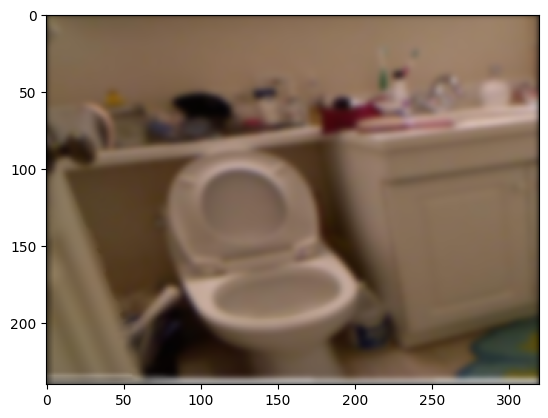

In [ ]:
import initialization

# AIF initialization

aif_init = initialization.compute_aif_initialization(defocus_stack, lmbda=0.05, sharpness_measure='sobel_grad')
plt.imshow(aif_init / 255.)
plt.show()

plt.imshow(defocus_stack[1] / 255.)
plt.show()

Depth range: [ 0.1 - 10.0 ]
Created experiment folder: experiments/coord-descent_2026-02-13_03-05-58
Images in range [0-255]


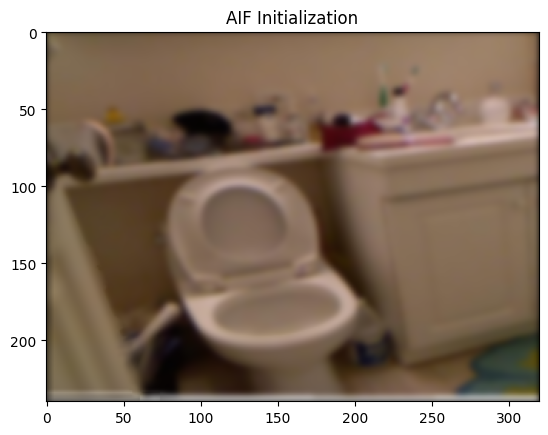

Iteration 0 



Grid search         : 100%|███████████████████| 100/100 [00:18<00:00,  5.45it/s]


GRID SEARCH DURATION 18.43337607383728


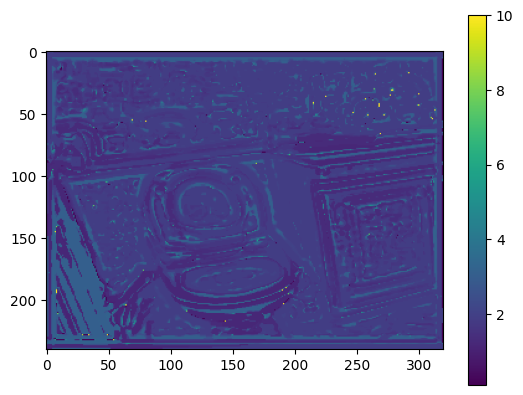


Golden-section search...
...searching for 100 % convergence
...done
GSS DURATION 14.558489322662354


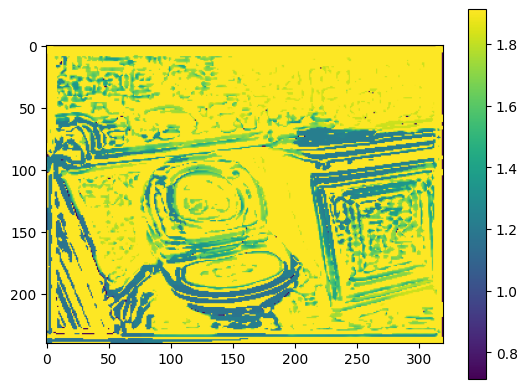

Loss: 22.301998 , TV: 32253.895

DPT result range: [ 0.104508504 , 9.995491 ]


Bounded FISTA...


Optimizing: 100%|██████████| 200/200 [01:12<00:00,  2.77it/s]


r1norm 2223.5488 norm(x) 51784.81
FISTA duration 75.40929865837097

AIF result range: [ 0.0 , 255.0 ]
Loss: 4.2918615 , TV: 4917082.5


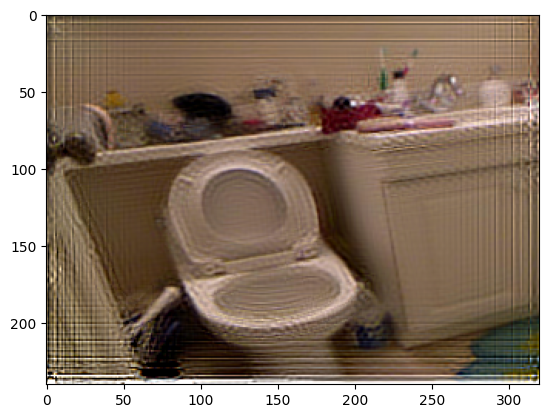

FULL ITER DURATION 110.58918023109436
T_i updated to 210


--------------------------

Iteration 1 



Grid search         : 100%|███████████████████| 100/100 [00:19<00:00,  5.24it/s]


GRID SEARCH DURATION 19.19833016395569


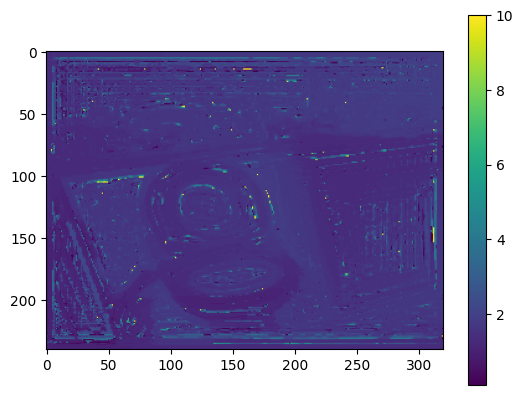


Golden-section search...
...searching for 100 % convergence
...done
GSS DURATION 19.711424827575684


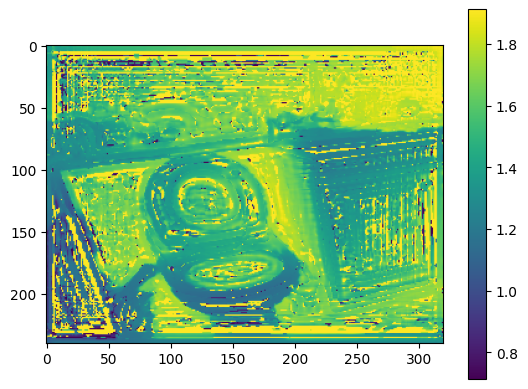

Loss: 1.5673997 , TV: 30898.375

DPT result range: [ 0.104508504 , 9.995491 ]


Bounded FISTA...


Optimizing: 100%|██████████| 210/210 [01:17<00:00,  2.70it/s]


r1norm 609.5937 norm(x) 51589.4
FISTA duration 80.7885148525238

AIF result range: [ 0.0 , 255.0 ]
Loss: 0.3225764 , TV: 2704745.8


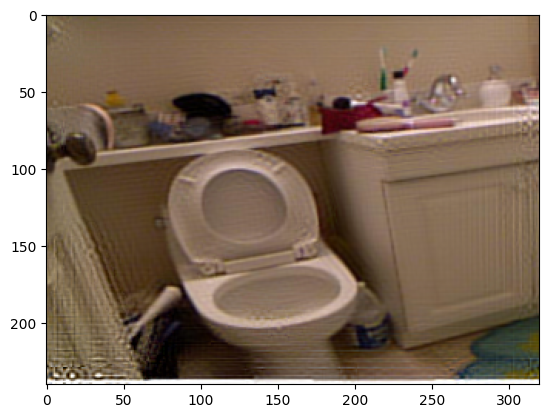

FULL ITER DURATION 122.29255986213684
T_i updated to 220


--------------------------

Iteration 2 



Grid search         : 100%|███████████████████| 100/100 [00:18<00:00,  5.41it/s]


GRID SEARCH DURATION 18.59720778465271


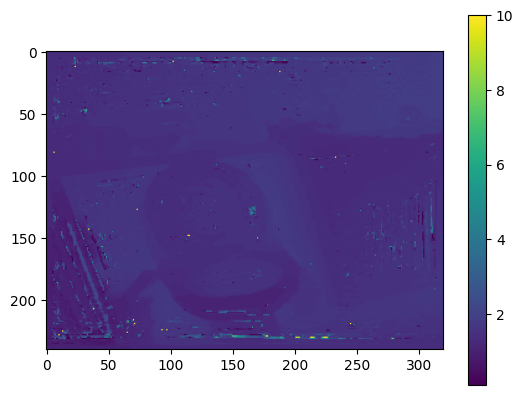


Golden-section search...
...searching for 100 % convergence
...done
GSS DURATION 14.72284483909607


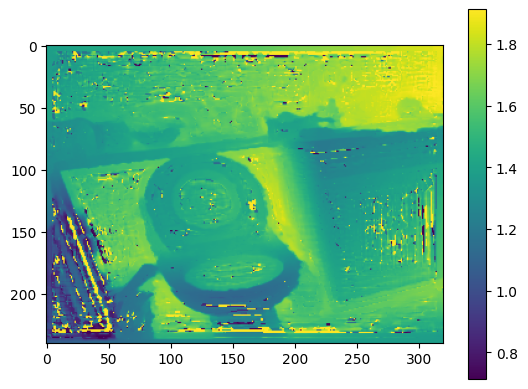

Loss: 0.10340439 , TV: 12284.793

DPT result range: [ 0.104508504 , 9.995491 ]


Bounded FISTA...


Optimizing: 100%|██████████| 220/220 [01:15<00:00,  2.90it/s]


r1norm 190.52762 norm(x) 51598.65
FISTA duration 78.64569735527039

AIF result range: [ 0.0 , 255.0 ]
Loss: 0.031510923 , TV: 2219261.2


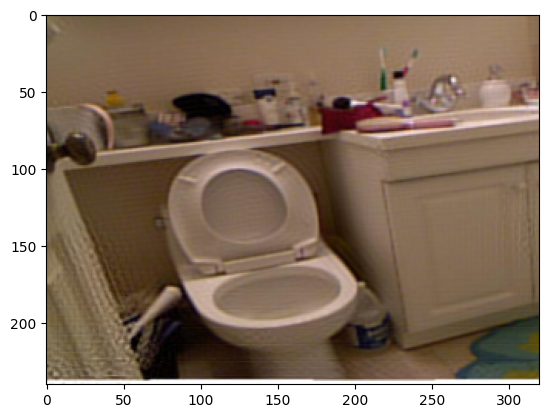

FULL ITER DURATION 114.17686080932617
T_i updated to 231


--------------------------

Iteration 3 



Grid search         : 100%|███████████████████| 100/100 [00:19<00:00,  5.24it/s]


GRID SEARCH DURATION 19.18351936340332


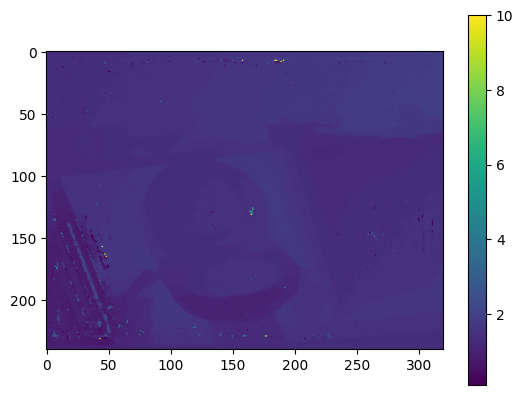


Golden-section search...
...searching for 100 % convergence
...done
GSS DURATION 12.64835524559021


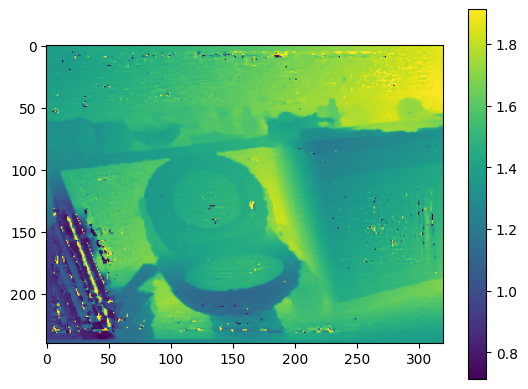

Loss: 0.01558689 , TV: 5076.7246

DPT result range: [ 0.104508504 , 9.995491 ]


Bounded FISTA...


Optimizing: 100%|██████████| 231/231 [01:11<00:00,  3.25it/s]


r1norm 97.18206 norm(x) 51601.688
FISTA duration 73.51188254356384

AIF result range: [ 0.0 , 255.0 ]
Loss: 0.008197931 , TV: 2086753.8


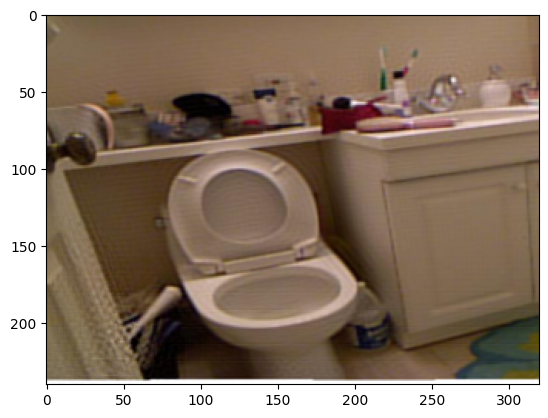

FULL ITER DURATION 107.16289591789246
T_i updated to 242


--------------------------

Iteration 4 



Grid search         : 100%|███████████████████| 100/100 [00:17<00:00,  5.87it/s]


GRID SEARCH DURATION 17.134217739105225


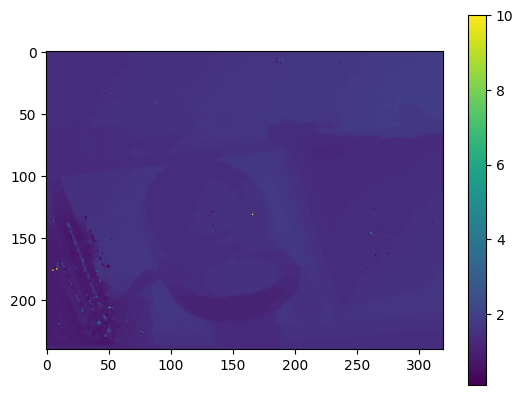


Golden-section search...
...searching for 100 % convergence
...done
GSS DURATION 12.424802303314209


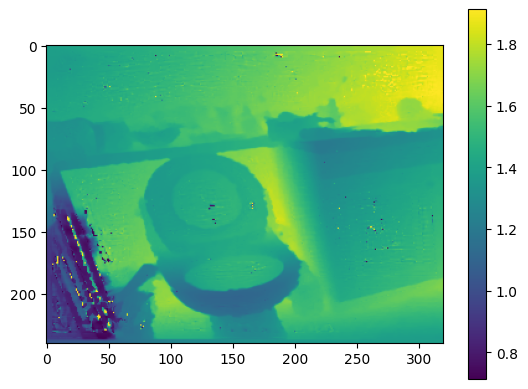

Loss: 0.005325016 , TV: 2775.557

DPT result range: [ 0.104508504 , 9.995491 ]


Bounded FISTA...


Optimizing: 100%|██████████| 242/242 [01:11<00:00,  3.36it/s]


r1norm 63.451668 norm(x) 51603.164
FISTA duration 74.35452461242676

AIF result range: [ 0.0 , 255.0 ]
Loss: 0.0034946345 , TV: 2044632.0


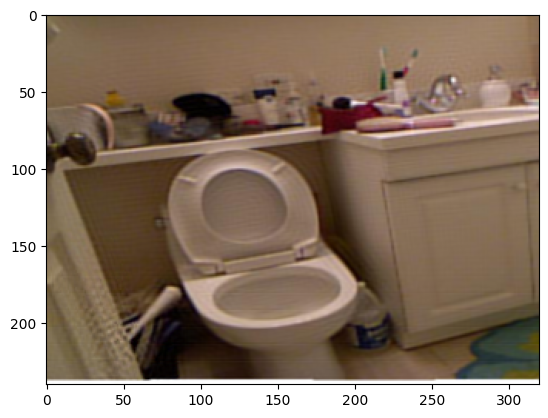

FULL ITER DURATION 105.80535840988159
T_i updated to 254


--------------------------



In [10]:
# -------------------
# COORDINATE DESCENT
# -------------------

import coordinate_descent


dpt, aif, _, _ = coordinate_descent.coordinate_descent(
    defocus_stack, show_plots = True,
        save_plots = False, num_epochs = 5,
        nesterov_first = False, aif_init = aif_init,                                             
        num_Z = 100, 
        T_0 = 200, alpha = 1.05,
        vmin = gt_dpt.min(), vmax = gt_dpt.max(), # this is just for visualization
        verbose = True)


In [11]:
print('RMS', utils.compute_RMS(dpt, gt_dpt))
print('Rel', utils.compute_AbsRel(dpt, gt_dpt))
print(utils.compute_accuracy_metrics(dpt, gt_dpt))


RMS 0.101576746
Rel 0.013046997
{'delta1': 0.9884375, 'delta2': 0.9958723958333333, 'delta3': 0.9975}


Removing outliers...
found 113 outliers


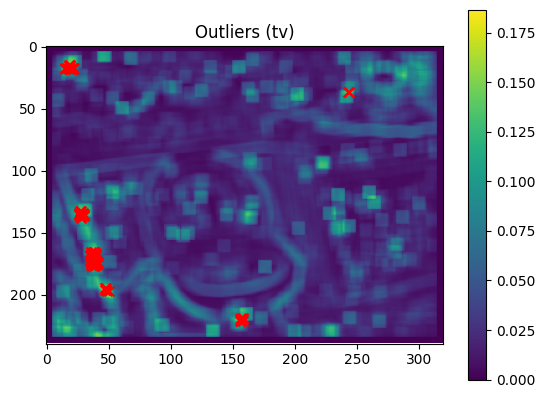

113 / 113 outliers removed


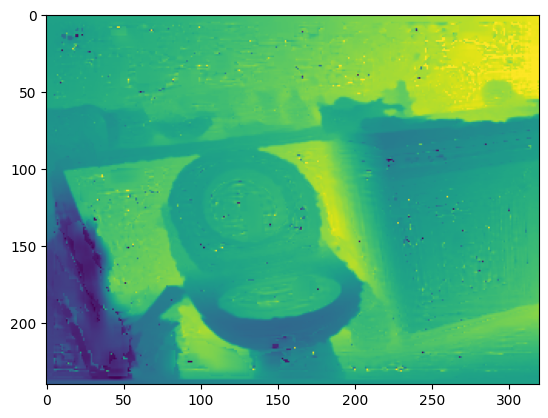

In [9]:
import outlier_removal

dpt_no_outliers, _ = outlier_removal.remove_outliers(
    dpt, aif, diff_thresh = 2, tv_thresh = 0.15, patch_type = 'tv'
)


plt.imshow(dpt_no_outliers, vmin=0.7, vmax=1.9)
plt.show()

